## Load Data

In [1]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Train Some Layers

In [3]:
# solution 6: Train some layers

batch_size = 512
initializer = tf.keras.initializers.RandomNormal()

# Ví dụ sub model 1
first = keras.Sequential()
first.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
first.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))

#################### YOUR CODE HERE ####################
# Các bạn thực hiện sub model 2 tương tự như cách thức của Ví dụ sub model 1
second = keras.Sequential()
second.add(keras.layers.Dense(128, activation='sigmoid',
                              kernel_initializer=initializer))
second.add(keras.layers.Dense(128, activation='sigmoid',
                              kernel_initializer=initializer))
########################################################

#################### YOUR CODE HERE ####################
# Các bạn thực hiện sub model 3 tương tự như cách thức của Ví dụ sub model 1
third = keras.Sequential()
third.add(keras.layers.Dense(128, activation='sigmoid',
                              kernel_initializer=initializer))
third.add(keras.layers.Dense(128, activation='sigmoid',
                              kernel_initializer=initializer))
########################################################

#################### YOUR CODE HERE ####################
# Các bạn thực hiện sub model 4 tương tự như cách thức của Ví dụ sub model 1
fourth = keras.Sequential()
fourth.add(keras.layers.Dense(128, activation='sigmoid',
                              kernel_initializer=initializer))
########################################################

### Train 1

In [4]:
# Ví dụ train lần 1 với sub model 1 (tạo model mới và thêm Input layer, sub model 1, Output layer)
first_model = keras.Sequential()
first_model.add(keras.Input(shape=(784,)))
first_model.add(first)
first_model.add(keras.layers.Dense(10))

first_model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = first_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=100, verbose=2)

Epoch 1/100
118/118 - 4s - loss: 2.2259 - accuracy: 0.3154 - val_loss: 2.1474 - val_accuracy: 0.4716 - 4s/epoch - 32ms/step
Epoch 2/100
118/118 - 2s - loss: 2.0814 - accuracy: 0.5499 - val_loss: 2.0170 - val_accuracy: 0.5804 - 2s/epoch - 19ms/step
Epoch 3/100
118/118 - 2s - loss: 1.9466 - accuracy: 0.6050 - val_loss: 1.8824 - val_accuracy: 0.6063 - 2s/epoch - 16ms/step
Epoch 4/100
118/118 - 1s - loss: 1.8130 - accuracy: 0.6331 - val_loss: 1.7517 - val_accuracy: 0.6635 - 1s/epoch - 11ms/step
Epoch 5/100
118/118 - 1s - loss: 1.6847 - accuracy: 0.6602 - val_loss: 1.6287 - val_accuracy: 0.6625 - 1s/epoch - 11ms/step
Epoch 6/100
118/118 - 1s - loss: 1.5674 - accuracy: 0.6716 - val_loss: 1.5195 - val_accuracy: 0.6701 - 1s/epoch - 11ms/step
Epoch 7/100
118/118 - 1s - loss: 1.4633 - accuracy: 0.6819 - val_loss: 1.4224 - val_accuracy: 0.6785 - 1s/epoch - 11ms/step
Epoch 8/100
118/118 - 1s - loss: 1.3708 - accuracy: 0.6891 - val_loss: 1.3369 - val_accuracy: 0.6863 - 1s/epoch - 11ms/step
Epoch 9/

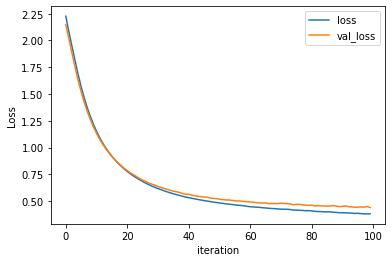

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

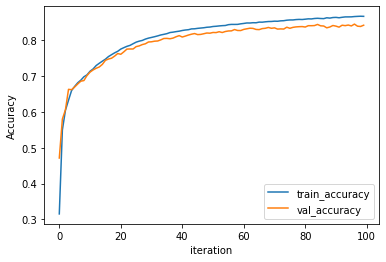

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### Train 2

In [7]:
# Fix first and train second
#################### YOUR CODE HERE ####################
# Các bạn thực hiện tương tự như Ví dụ train lần 1 
# Train lần 2: Ghép sub mode 1 và 2 lại với nhau. Train với 100 epoch nhưng freeze (fix) weight của sub model 1 
# (tạo model mới và thêm Input layer, sub model 1, sub model 2, Output layer)
second_model = keras.Sequential()
second_model.add(keras.Input(shape=(784,)))
second_model.add(first)
second_model.add(second)
second_model.add(keras.layers.Dense(10))

# freeze sub model 1
first.trainable = False

########################################################
second_model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = second_model.fit(X_train, y_train, batch_size,
                           validation_data=(X_test, y_test),
                           epochs=100, verbose=2)

Epoch 1/100
118/118 - 2s - loss: 2.3250 - accuracy: 0.1176 - val_loss: 2.2998 - val_accuracy: 0.1000 - 2s/epoch - 17ms/step
Epoch 2/100
118/118 - 1s - loss: 2.2984 - accuracy: 0.1311 - val_loss: 2.2971 - val_accuracy: 0.1000 - 1s/epoch - 11ms/step
Epoch 3/100
118/118 - 1s - loss: 2.2958 - accuracy: 0.1858 - val_loss: 2.2946 - val_accuracy: 0.1000 - 1s/epoch - 11ms/step
Epoch 4/100
118/118 - 1s - loss: 2.2932 - accuracy: 0.2047 - val_loss: 2.2918 - val_accuracy: 0.1937 - 1s/epoch - 11ms/step
Epoch 5/100
118/118 - 1s - loss: 2.2904 - accuracy: 0.2561 - val_loss: 2.2890 - val_accuracy: 0.2027 - 1s/epoch - 11ms/step
Epoch 6/100
118/118 - 1s - loss: 2.2876 - accuracy: 0.3282 - val_loss: 2.2861 - val_accuracy: 0.2071 - 1s/epoch - 10ms/step
Epoch 7/100
118/118 - 1s - loss: 2.2846 - accuracy: 0.3104 - val_loss: 2.2829 - val_accuracy: 0.4367 - 1s/epoch - 10ms/step
Epoch 8/100
118/118 - 1s - loss: 2.2814 - accuracy: 0.3823 - val_loss: 2.2796 - val_accuracy: 0.5496 - 1s/epoch - 10ms/step
Epoch 9/

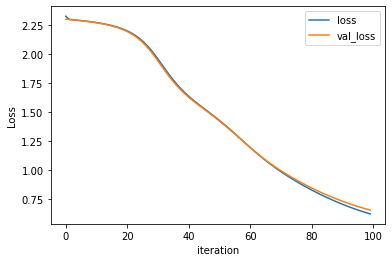

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

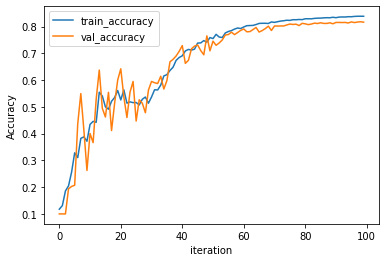

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### Train 3

In [10]:
# train first and second
#################### YOUR CODE HERE ####################
# Các bạn thực hiện tương tự như Ví dụ train lần 1 
# Train lần 3: Tiếp tục train thêm 100 epoch nhưng lần này không fix weight của sub model 1
# (tạo model mới và thêm Input layer, sub model 1, sub model 2, Output layer)
second_model = keras.Sequential()
second_model.add(keras.Input(shape=(784,)))
second_model.add(first)
second_model.add(second)
second_model.add(keras.layers.Dense(10))

# unfreeze sub model 1
first.trainable = True

########################################################

second_model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = second_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=100, verbose=2)

Epoch 1/100
118/118 - 3s - loss: 2.2054 - accuracy: 0.1975 - val_loss: 1.9769 - val_accuracy: 0.5147 - 3s/epoch - 21ms/step
Epoch 2/100
118/118 - 2s - loss: 1.8336 - accuracy: 0.6348 - val_loss: 1.7116 - val_accuracy: 0.6655 - 2s/epoch - 14ms/step
Epoch 3/100
118/118 - 2s - loss: 1.6083 - accuracy: 0.6905 - val_loss: 1.5241 - val_accuracy: 0.6851 - 2s/epoch - 14ms/step
Epoch 4/100
118/118 - 2s - loss: 1.4449 - accuracy: 0.7122 - val_loss: 1.3846 - val_accuracy: 0.7314 - 2s/epoch - 14ms/step
Epoch 5/100
118/118 - 3s - loss: 1.3197 - accuracy: 0.7412 - val_loss: 1.2758 - val_accuracy: 0.7421 - 3s/epoch - 25ms/step
Epoch 6/100
118/118 - 2s - loss: 1.2203 - accuracy: 0.7597 - val_loss: 1.1882 - val_accuracy: 0.7520 - 2s/epoch - 17ms/step
Epoch 7/100
118/118 - 2s - loss: 1.1385 - accuracy: 0.7724 - val_loss: 1.1151 - val_accuracy: 0.7649 - 2s/epoch - 14ms/step
Epoch 8/100
118/118 - 2s - loss: 1.0699 - accuracy: 0.7835 - val_loss: 1.0547 - val_accuracy: 0.7740 - 2s/epoch - 14ms/step
Epoch 9/

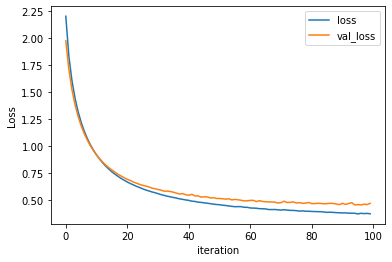

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

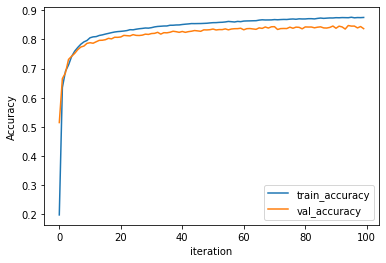

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### Train 4

In [13]:
# fix first and second, train third
#################### YOUR CODE HERE ####################
# Các bạn thực hiện tương tự như Ví dụ train lần 1 
# Train lần 4: Ghép sub mode 1, 2 và 3 lại với nhau. Train với 100 epoch nhưng fix weight của sub model 1 và 2
# (tạo model mới và thêm Input layer, sub model 1, sub model 2, sub model 3, Output layer)
third_model = keras.Sequential()
third_model.add(keras.Input(shape=(784,)))
third_model.add(first)
third_model.add(second)
third_model.add(third)
third_model.add(keras.layers.Dense(10))

# freeze sub model 1 và sub model 2
first.trainable = False
second.trainable = False
########################################################


third_model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = third_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=100, verbose=2)

Epoch 1/100
118/118 - 2s - loss: 2.3085 - accuracy: 0.1172 - val_loss: 2.2981 - val_accuracy: 0.1000 - 2s/epoch - 18ms/step
Epoch 2/100
118/118 - 1s - loss: 2.2964 - accuracy: 0.1682 - val_loss: 2.2948 - val_accuracy: 0.1000 - 1s/epoch - 12ms/step
Epoch 3/100
118/118 - 1s - loss: 2.2931 - accuracy: 0.2262 - val_loss: 2.2917 - val_accuracy: 0.1000 - 1s/epoch - 13ms/step
Epoch 4/100
118/118 - 1s - loss: 2.2896 - accuracy: 0.2299 - val_loss: 2.2881 - val_accuracy: 0.1722 - 1s/epoch - 12ms/step
Epoch 5/100
118/118 - 1s - loss: 2.2860 - accuracy: 0.2967 - val_loss: 2.2844 - val_accuracy: 0.2393 - 1s/epoch - 12ms/step
Epoch 6/100
118/118 - 1s - loss: 2.2822 - accuracy: 0.4152 - val_loss: 2.2805 - val_accuracy: 0.2976 - 1s/epoch - 12ms/step
Epoch 7/100
118/118 - 1s - loss: 2.2781 - accuracy: 0.4138 - val_loss: 2.2762 - val_accuracy: 0.4530 - 1s/epoch - 12ms/step
Epoch 8/100
118/118 - 1s - loss: 2.2737 - accuracy: 0.4545 - val_loss: 2.2716 - val_accuracy: 0.5338 - 1s/epoch - 12ms/step
Epoch 9/

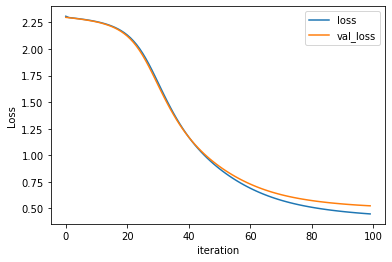

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

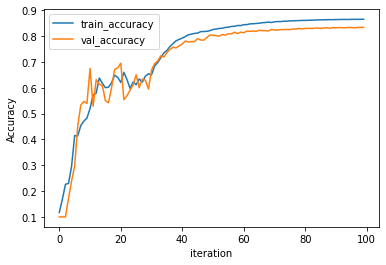

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### Train 5

In [16]:
# train first, second, and third
#################### YOUR CODE HERE ####################
# Các bạn thực hiện tương tự như Ví dụ train lần 1 
# Train lần 5: Tiếp tục train thêm 100 epoch nhưng lần này không fix weight của sub model 1 và sub model 2
# (tạo model mới và thêm Input layer, sub model 1, sub model 2, sub model 3, Output layer)
third_model = keras.Sequential()
third_model.add(keras.Input(shape=(784,)))
third_model.add(first)
third_model.add(second)
third_model.add(third)
third_model.add(keras.layers.Dense(10))

# unfreeze sub model 1 và sub model 2
first.trainable = True
second.trainable = True
########################################################


third_model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = third_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=100, verbose=2)

Epoch 1/100
118/118 - 3s - loss: 1.9834 - accuracy: 0.4269 - val_loss: 1.7431 - val_accuracy: 0.6561 - 3s/epoch - 26ms/step
Epoch 2/100
118/118 - 2s - loss: 1.5907 - accuracy: 0.7012 - val_loss: 1.4713 - val_accuracy: 0.7056 - 2s/epoch - 17ms/step
Epoch 3/100
118/118 - 2s - loss: 1.3644 - accuracy: 0.7392 - val_loss: 1.2910 - val_accuracy: 0.7371 - 2s/epoch - 17ms/step
Epoch 4/100
118/118 - 2s - loss: 1.2042 - accuracy: 0.7800 - val_loss: 1.1575 - val_accuracy: 0.7709 - 2s/epoch - 17ms/step
Epoch 5/100
118/118 - 2s - loss: 1.0814 - accuracy: 0.8170 - val_loss: 1.0533 - val_accuracy: 0.8075 - 2s/epoch - 18ms/step
Epoch 6/100
118/118 - 4s - loss: 0.9843 - accuracy: 0.8437 - val_loss: 0.9695 - val_accuracy: 0.8199 - 4s/epoch - 30ms/step
Epoch 7/100
118/118 - 2s - loss: 0.9050 - accuracy: 0.8499 - val_loss: 0.9034 - val_accuracy: 0.8242 - 2s/epoch - 20ms/step
Epoch 8/100
118/118 - 2s - loss: 0.8411 - accuracy: 0.8548 - val_loss: 0.8493 - val_accuracy: 0.8281 - 2s/epoch - 20ms/step
Epoch 9/

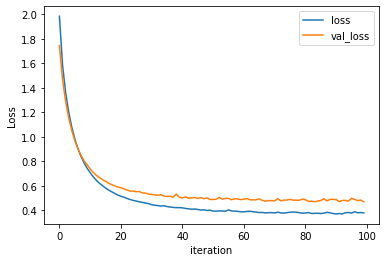

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

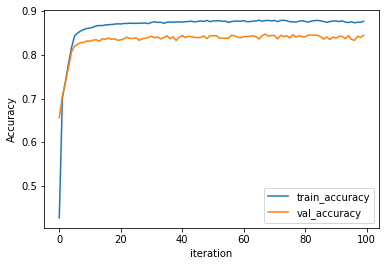

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### Train 6

In [19]:
# fix first, second and third, and train fourth
#################### YOUR CODE HERE ####################
# Các bạn thực hiện tương tự như Ví dụ train lần 1 
# Train lần 6:  Ghép sub mode 1, 2, 3 và 4 lại với nhau. Train với 100 epoch nhưng fix weight của sub model 1, sub model 2 và sub model 3
# (tạo model mới và thêm Input layer, sub model 1, sub model 2, sub model 3, sub model 4 , Output layer)
fourth_model = keras.Sequential()
fourth_model.add(keras.Input(shape=(784,)))
fourth_model.add(first)
fourth_model.add(second)
fourth_model.add(third)
fourth_model.add(fourth)
fourth_model.add(keras.layers.Dense(10))

# freeze sub model 1 ,sub model 2 và sub model 3
first.trainable = False
second.trainable = False
third.trainable = False
########################################################


fourth_model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = fourth_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=100, verbose=2)

Epoch 1/100
118/118 - 2s - loss: 2.2653 - accuracy: 0.2558 - val_loss: 2.1892 - val_accuracy: 0.4890 - 2s/epoch - 20ms/step
Epoch 2/100
118/118 - 1s - loss: 2.1238 - accuracy: 0.6049 - val_loss: 2.0627 - val_accuracy: 0.6744 - 1s/epoch - 12ms/step
Epoch 3/100
118/118 - 1s - loss: 1.9971 - accuracy: 0.7426 - val_loss: 1.9395 - val_accuracy: 0.7672 - 1s/epoch - 12ms/step
Epoch 4/100
118/118 - 1s - loss: 1.8726 - accuracy: 0.8174 - val_loss: 1.8179 - val_accuracy: 0.8099 - 1s/epoch - 12ms/step
Epoch 5/100
118/118 - 1s - loss: 1.7503 - accuracy: 0.8330 - val_loss: 1.6996 - val_accuracy: 0.8031 - 1s/epoch - 12ms/step
Epoch 6/100
118/118 - 1s - loss: 1.6322 - accuracy: 0.8400 - val_loss: 1.5870 - val_accuracy: 0.8116 - 1s/epoch - 13ms/step
Epoch 7/100
118/118 - 1s - loss: 1.5203 - accuracy: 0.8480 - val_loss: 1.4814 - val_accuracy: 0.8197 - 1s/epoch - 13ms/step
Epoch 8/100
118/118 - 1s - loss: 1.4162 - accuracy: 0.8540 - val_loss: 1.3843 - val_accuracy: 0.8247 - 1s/epoch - 12ms/step
Epoch 9/

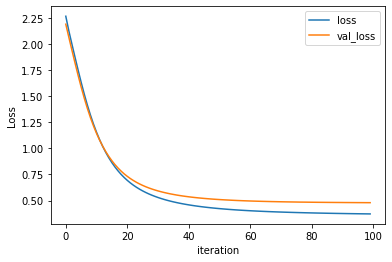

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

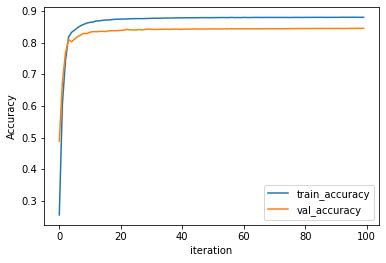

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### Train 7

In [22]:
# first, second, third, and fourth
#################### YOUR CODE HERE ####################
# Các bạn thực hiện tương tự như Ví dụ train lần 1 
# Train lần 7:  Tiếp tục train thêm 300 epoch nhưng lần này không fix weight của sub model 1, sub model 2 và sub model 3
# (tạo model mới và thêm Input layer, sub model 1, sub model 2, sub model 3, sub model 4 , Output layer)
fourth_model = keras.Sequential()
fourth_model.add(keras.Input(shape=(784,)))
fourth_model.add(first)
fourth_model.add(second)
fourth_model.add(third)
fourth_model.add(fourth)
fourth_model.add(keras.layers.Dense(10))

# unfreeze sub model 1 ,sub model 2 và sub model 3
first.trainable = True
second.trainable = True
third.trainable = True
########################################################

fourth_model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = fourth_model.fit(X_train, y_train, batch_size,
                          validation_data=(X_test, y_test),
                          epochs=300, verbose=2)

Epoch 1/300
118/118 - 4s - loss: 2.0101 - accuracy: 0.3737 - val_loss: 1.7157 - val_accuracy: 0.5890 - 4s/epoch - 32ms/step
Epoch 2/300
118/118 - 2s - loss: 1.5401 - accuracy: 0.6474 - val_loss: 1.4069 - val_accuracy: 0.6830 - 2s/epoch - 20ms/step
Epoch 3/300
118/118 - 2s - loss: 1.2824 - accuracy: 0.7506 - val_loss: 1.2037 - val_accuracy: 0.7683 - 2s/epoch - 19ms/step
Epoch 4/300
118/118 - 2s - loss: 1.1011 - accuracy: 0.8258 - val_loss: 1.0557 - val_accuracy: 0.8115 - 2s/epoch - 19ms/step
Epoch 5/300
118/118 - 2s - loss: 0.9661 - accuracy: 0.8501 - val_loss: 0.9462 - val_accuracy: 0.8237 - 2s/epoch - 20ms/step
Epoch 6/300
118/118 - 2s - loss: 0.8638 - accuracy: 0.8612 - val_loss: 0.8645 - val_accuracy: 0.8270 - 2s/epoch - 19ms/step
Epoch 7/300
118/118 - 2s - loss: 0.7851 - accuracy: 0.8663 - val_loss: 0.7994 - val_accuracy: 0.8302 - 2s/epoch - 19ms/step
Epoch 8/300
118/118 - 2s - loss: 0.7221 - accuracy: 0.8698 - val_loss: 0.7486 - val_accuracy: 0.8326 - 2s/epoch - 19ms/step
Epoch 9/

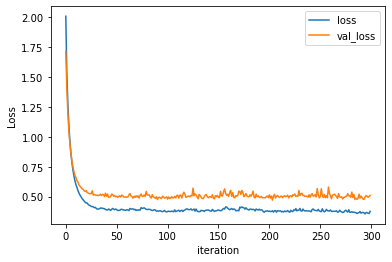

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

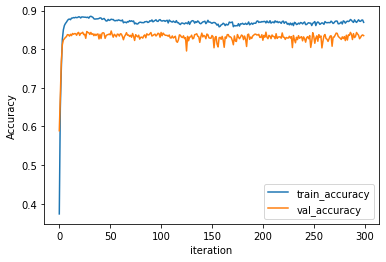

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()